# Final Project: Comparison of Regression Models

In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

 ### 1. Linear Regression and Feature/Target analysis

In [2]:
# My data set:
#Reads the number of rows and columns of the dataframe (df). Corresponding with instances and features.
data_diabetes = datasets.load_diabetes(as_frame=True)
df2 = data_diabetes['frame']
num_rows, num_cols = df2.shape
print(f"\nDiabetes dataset:")
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Diabetes dataset:
Number of rows: 442
Number of columns: 11


In [3]:
#Prints the first 5 rows of data to visualize the structure of the dataset.
#Gives a way to see all the features (columns)
print(df2.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [4]:
#split data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(df2[["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]], df2["target"], test_size=0.25, random_state=123)

In [5]:
#Do the linear regression
reg = LinearRegression()
reg.fit(train_features, train_target)
train_predict = reg.predict(train_features)
test_predict = reg.predict(test_features)
print(reg.coef_, reg.intercept_)

[  29.86776596 -244.71800399  496.94398559  316.10984437 -805.22595689
  447.64502499  110.57764843  279.56782309  683.82210035   77.44862371] 152.57263796494206


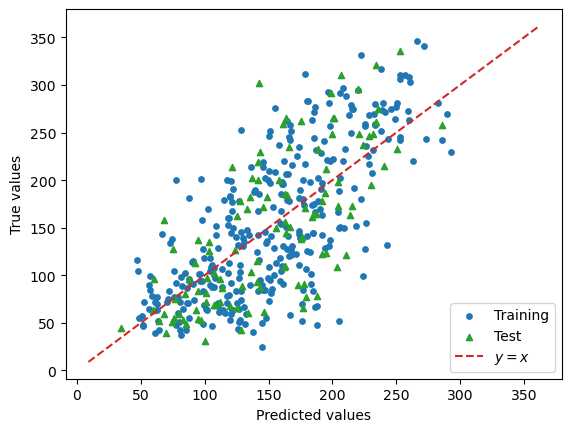

In [6]:
#Plot the predicted values to the true values. Our goal is to have them agree.
plt.scatter(train_predict, train_target, c="C0", s=15, label="Training")
plt.scatter(test_predict, test_target, c="C2", s=20, marker="^", label="Test")

# this complicated line is just for getting the values of the lower left and upper right corners of the plot
corners = np.diag(np.quantile(np.stack([plt.gca().get_xlim(), plt.gca().get_ylim()]), [0, 1], axis=0))
plt.plot(corners, corners, c="C3", ls="--", label="$y=x$")

plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Train target')

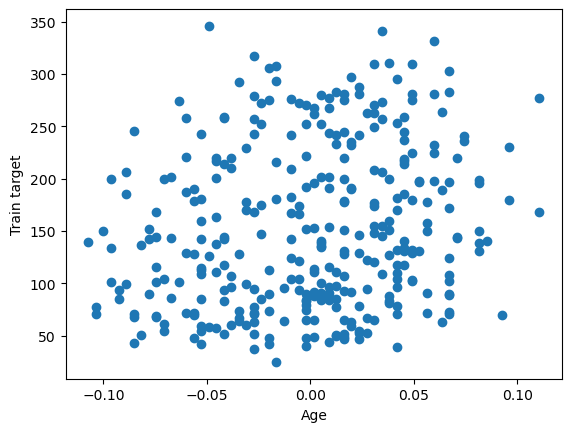

In [7]:
# Examine Age vs Target
plt.scatter(train_features["age"], train_target)
plt.xlabel("Age")
plt.ylabel("Train target")

Text(0, 0.5, 'Train target')

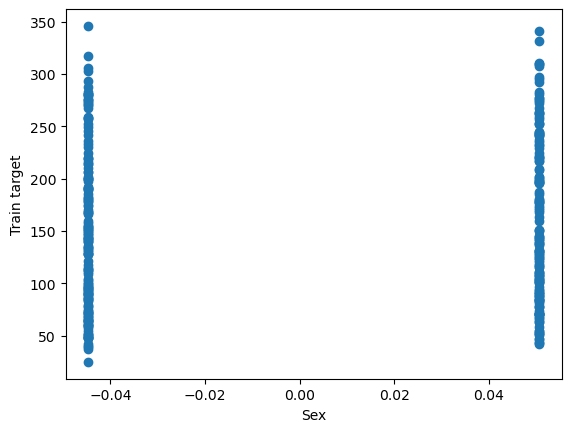

In [8]:
# Examine Age vs Target
plt.scatter(train_features["sex"], train_target)
plt.xlabel("Sex")
plt.ylabel("Train target")

Text(0, 0.5, 'Train target')

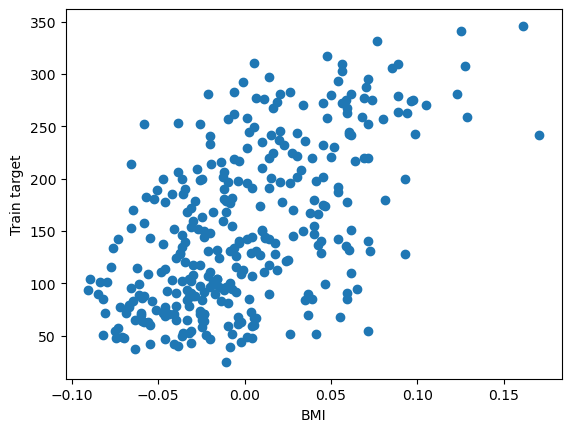

In [9]:
# Examine BMI vs Target
plt.scatter(train_features["bmi"], train_target)
plt.xlabel("BMI")
plt.ylabel("Train target")

Text(0, 0.5, 'Train target')

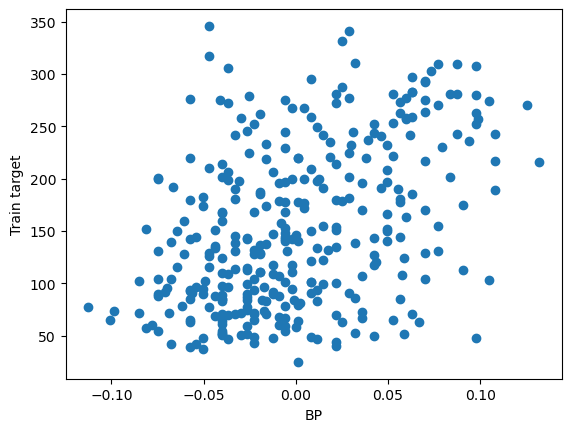

In [10]:
# Examine bp vs Target
plt.scatter(train_features["bp"], train_target)
plt.xlabel("BP")
plt.ylabel("Train target")

Text(0, 0.5, 'Train target')

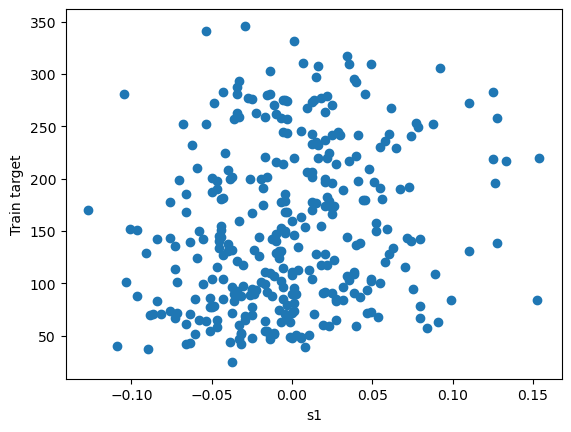

In [11]:
# Examine s1 vs Target
plt.scatter(train_features["s1"], train_target)
plt.xlabel("s1")
plt.ylabel("Train target")

Text(0, 0.5, 'Train target')

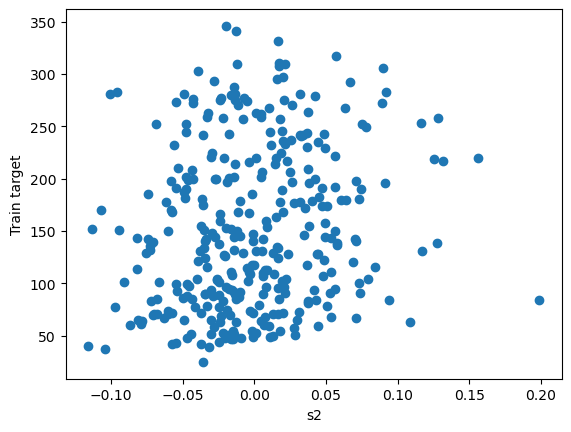

In [12]:
# Examine s2 vs Target
plt.scatter(train_features["s2"], train_target)
plt.xlabel("s2")
plt.ylabel("Train target")

Text(0, 0.5, 'Train target')

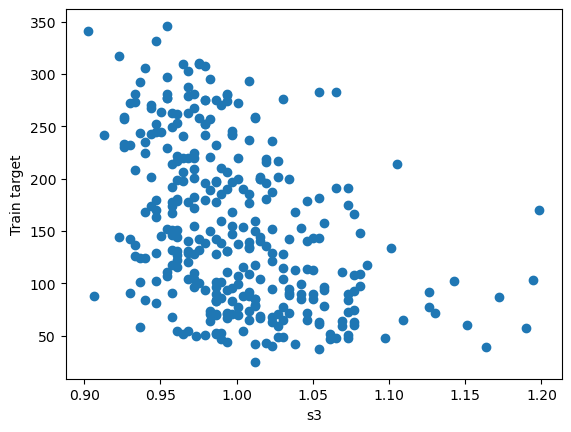

In [13]:
# Examine s3 vs Target
plt.scatter(np.exp(train_features["s3"]), train_target)
plt.xlabel("s3")
plt.ylabel("Train target")

Text(0, 0.5, 'Train target')

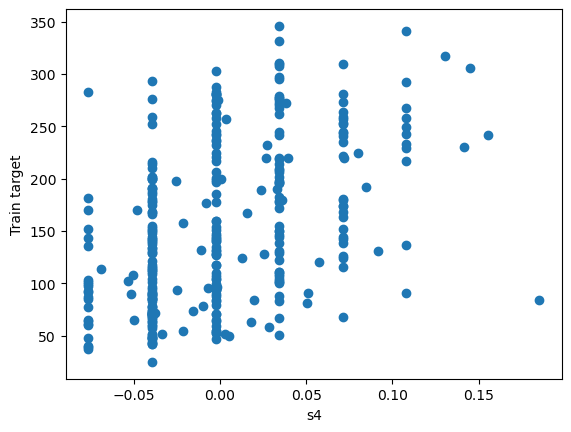

In [14]:
# Examine s4 vs Target
plt.scatter(train_features["s4"], train_target)
plt.xlabel("s4")
plt.ylabel("Train target")

Text(0, 0.5, 'Train target')

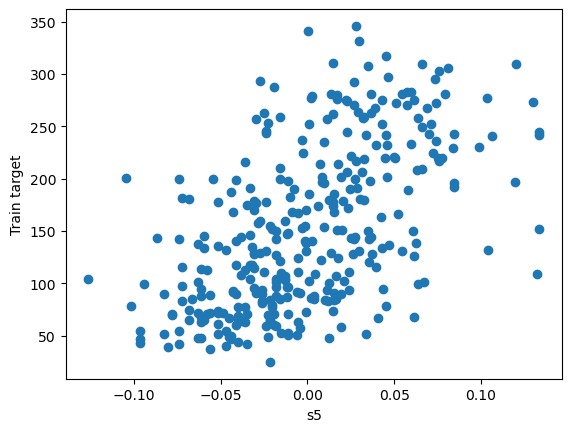

In [15]:
# Examine s5 vs Target
plt.scatter(train_features["s5"], train_target)
plt.xlabel("s5")
plt.ylabel("Train target")

Text(0, 0.5, 'Train target')

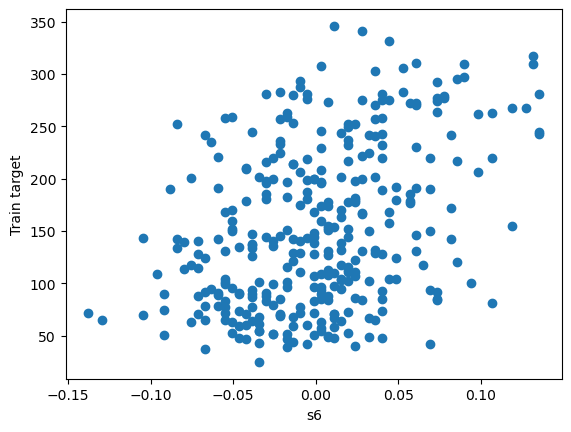

In [16]:
# Examine s6 vs Target
plt.scatter(train_features["s6"], train_target)
plt.xlabel("s6")
plt.ylabel("Train target")

In [17]:
#Time to compare features

Text(0, 0.5, 'Sex')

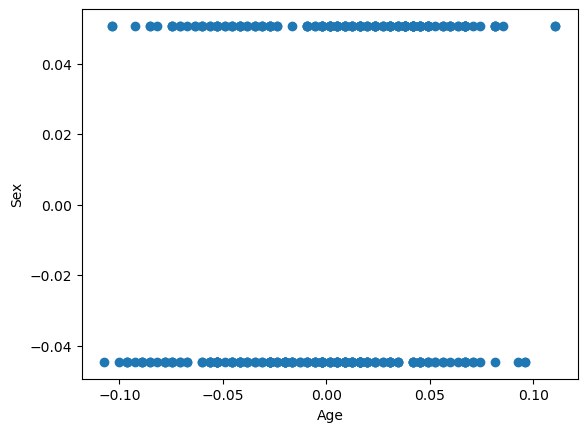

In [18]:
# Examine Age vs Sex
plt.scatter(train_features["age"], train_features["sex"])
plt.xlabel("Age")
plt.ylabel("Sex")

Text(0, 0.5, 'bmi')

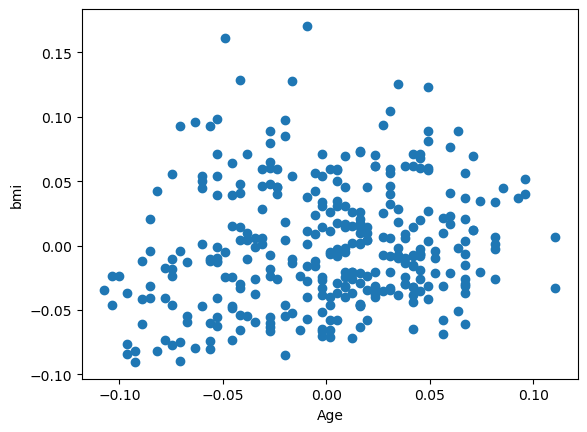

In [19]:
# Examine Age vs BMI
plt.scatter(train_features["age"], train_features["bmi"])
plt.xlabel("Age")
plt.ylabel("bmi")

Text(0, 0.5, 'bp')

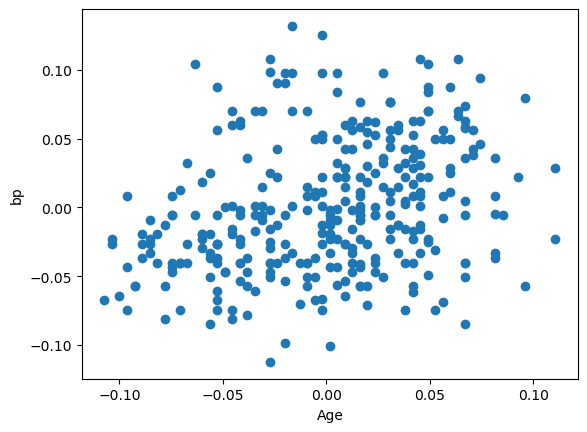

In [20]:
# Examine Age vs Sex
plt.scatter(train_features["age"], train_features["bp"])
plt.xlabel("Age")
plt.ylabel("bp")

Text(0, 0.5, 'S1')

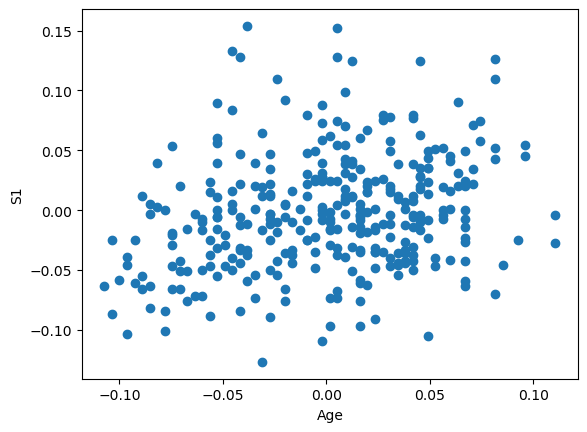

In [21]:
# Examine Age vs S1
plt.scatter(train_features["age"], train_features["s1"])
plt.xlabel("Age")
plt.ylabel("S1")

Text(0, 0.5, 'S2')

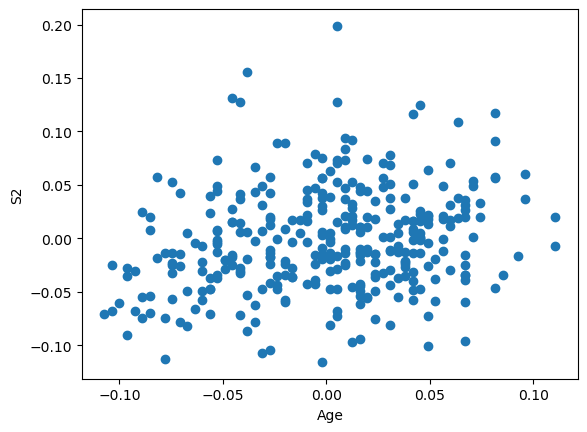

In [22]:
# Examine Age vs S2
plt.scatter(train_features["age"], train_features["s2"])
plt.xlabel("Age")
plt.ylabel("S2")

Text(0, 0.5, 'S3')

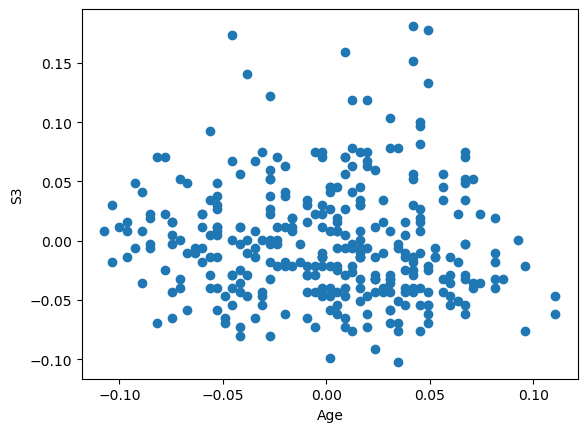

In [23]:
# Examine Age vs S3
plt.scatter(train_features["age"], train_features["s3"])
plt.xlabel("Age")
plt.ylabel("S3")

Text(0, 0.5, 'S4')

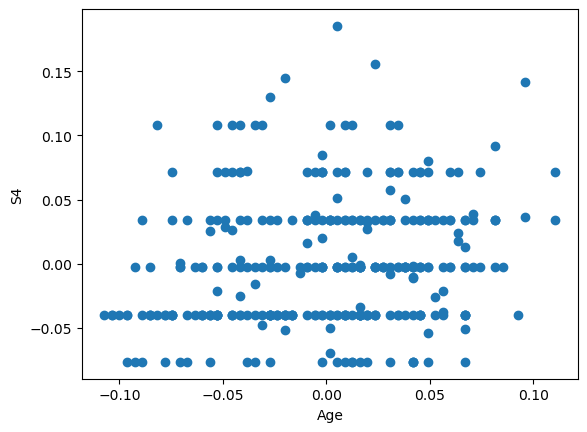

In [24]:
# Examine Age vs S4
plt.scatter(train_features["age"], train_features["s4"])
plt.xlabel("Age")
plt.ylabel("S4")

Text(0, 0.5, 'S5')

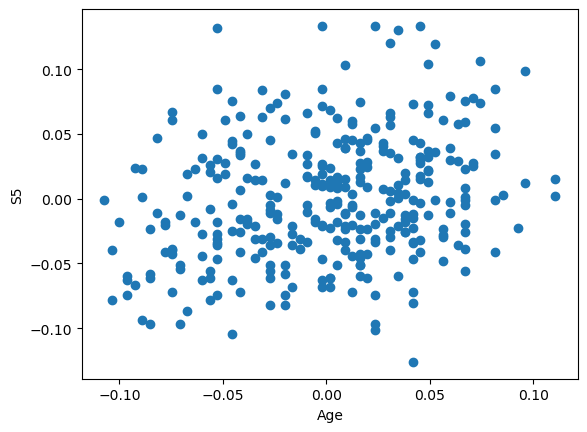

In [25]:
# Examine Age vs S5
plt.scatter(train_features["age"], train_features["s5"])
plt.xlabel("Age")
plt.ylabel("S5")

Text(0, 0.5, 'S6')

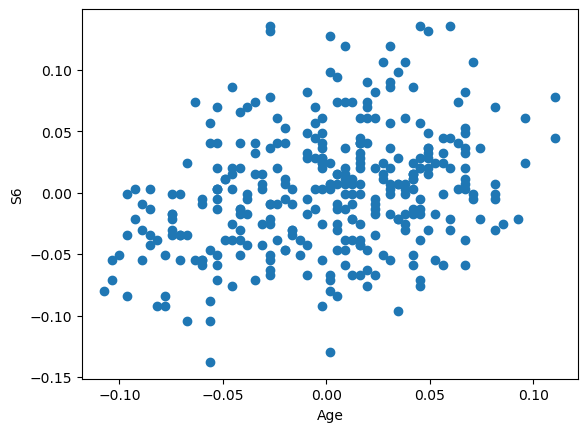

In [26]:
# Examine Age vs S6
plt.scatter(train_features["age"], train_features["s6"])
plt.xlabel("Age")
plt.ylabel("S6")

In [27]:
#Correlations with sex

Text(0, 0.5, 'Age')

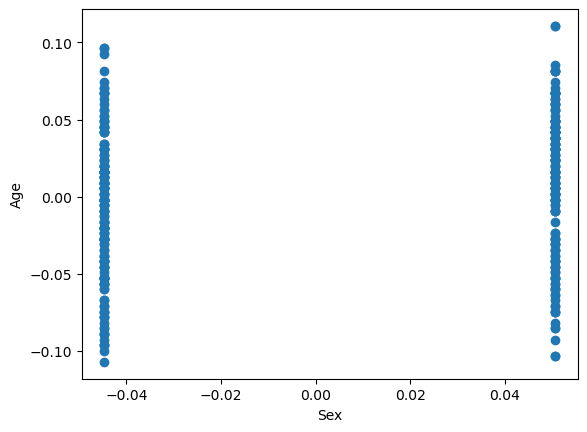

In [28]:
# Examine Sex vs Age
plt.scatter(train_features["sex"], train_features["age"])
plt.xlabel("Sex")
plt.ylabel("Age")

Text(0, 0.5, 'BMI')

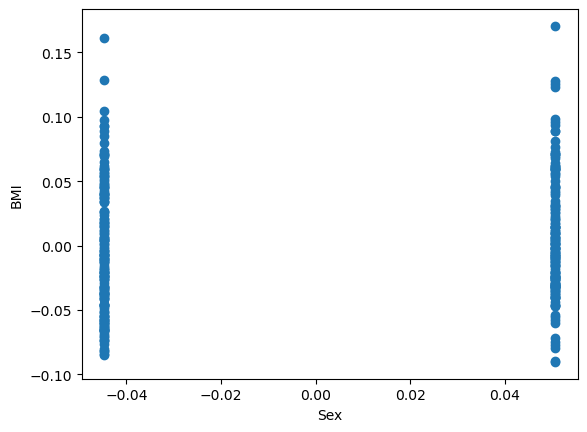

In [29]:
# Examine Sex vs bmi
plt.scatter(train_features["sex"], train_features["bmi"])
plt.xlabel("Sex")
plt.ylabel("BMI")

Text(0, 0.5, 'bp')

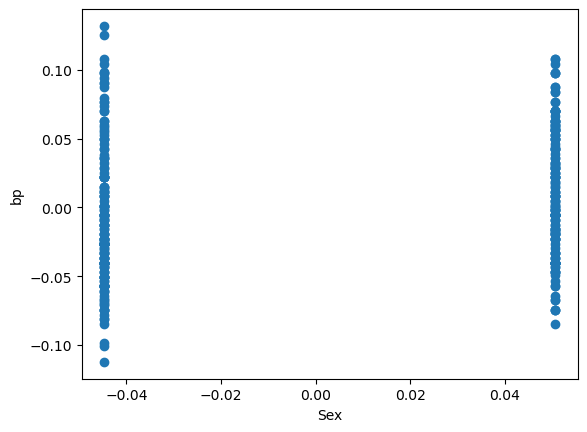

In [30]:
# Examine Sex vs bp
plt.scatter(train_features["sex"], train_features["bp"])
plt.xlabel("Sex")
plt.ylabel("bp")

In [31]:
#This should be enough to get the point across.
#Some correlations are rather weak or a categorical feature is practically useless in terms of information.

In [32]:
#This is where transformations could be made to different features. For example: np.exp(train_features["s3"])
#In this case, I'm finding it hard to determine transformations.

train_features_transformed = np.stack([train_features["age"], train_features["sex"], train_features["bmi"], train_features["bp"], train_features["s1"], train_features["s2"], (train_features["s3"]), train_features["s4"], train_features["s5"], train_features["s6"]]).T
test_features_transformed = np.stack([test_features["age"], test_features["sex"], test_features["bmi"], test_features["bp"], test_features["s1"], test_features["s2"], (test_features["s3"]), test_features["s4"], test_features["s5"], test_features["s6"]]).T

In [33]:
#Patterns are very unclear to be able to make any transformations above.

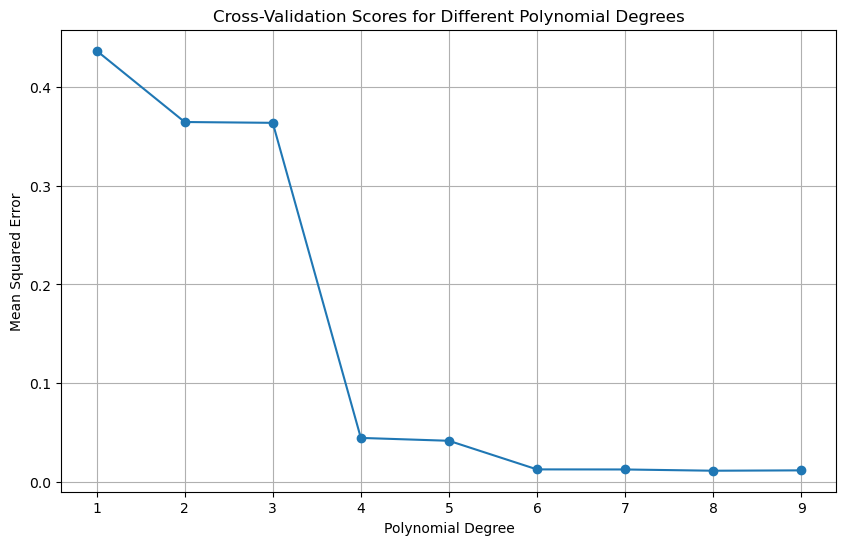

Optimal polynomial degree: 8


In [34]:
#Cross validation
#The goal is to determine the best polynomial degree. Balance of minimizing error but also not creating too many dimensions.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Sample data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = np.sin(X).ravel() + np.random.randn(100) * 0.1

# Set polynomial testing range
degrees = np.arange(1, 10)

# Cross validate the polynomial testing range
cv_scores = []
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error') #this is a five fold validation
    cv_scores.append(-np.mean(scores))

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, cv_scores, marker='o')
plt.title('Cross-Validation Scores for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.grid(True)
plt.show()

# Output the "optimal" polynomial degree, but it is important to consider how many dimensions this adds
optimal_degree = degrees[np.argmin(cv_scores)]
print(f'Optimal polynomial degree: {optimal_degree}')


In [35]:
# Step 1: Normalization

#Normalize Option 0: Min/Max
scaler = MinMaxScaler()
train_features_normalized0 = scaler.fit_transform(train_features)
test_features_normalized0 = scaler.transform(test_features)

#Normalize Option 1: L1 Regularization
from sklearn import preprocessing
# Normalize train_features with L1
train_features_normalized1 = preprocessing.normalize(train_features, norm='l1')
test_features_normalized1 = preprocessing.normalize(test_features, norm='l1')

#Normalize Option 2: L2 Regularization 
train_features_normalized2 = preprocessing.normalize(train_features, norm='l2')
test_features_normalized2 = preprocessing.normalize(test_features, norm='l2')

#Normalize Option 3: Max
train_features_normalized3 = preprocessing.normalize(train_features, norm='max')
test_features_normalized3 = preprocessing.normalize(test_features, norm='max')


# Step 2: Polynomial Features
poly = PolynomialFeatures(degree=4)  # degree is the order of polynomial. My cross validation above helps pick best.
train_features_poly = poly.fit_transform(train_features_normalized1)
test_features_poly = poly.transform(test_features_normalized1)

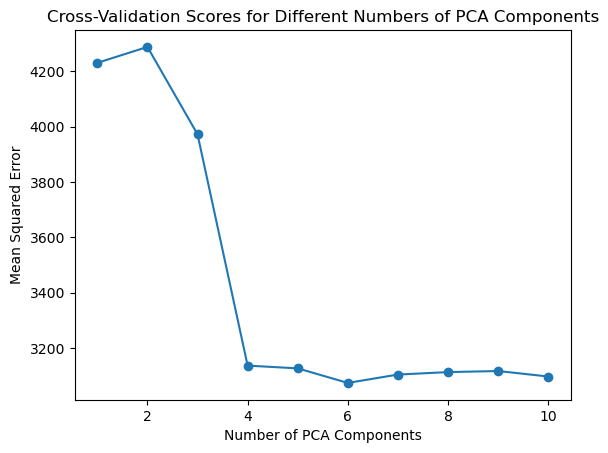

Best number of PCA components: 6


In [36]:
# Define the pipeline with Principal Component Analysis (PCA) and Linear Regression
pipe = Pipeline([('pca', PCA()),('reg', LinearRegression())])
param_grid = {'pca__n_components': np.arange(1, 11)}  #I have 10 features to begin with, so looking at 10 or less components is my goal.

# Finding error for each number of components
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_features_poly, train_target)

# Plotting the cross validation
plt.plot(param_grid['pca__n_components'], -grid_search.cv_results_['mean_test_score'], marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation Scores for Different Numbers of PCA Components')
plt.show()

#Reading out the "best" option. In this case I still choose another number due to similar error but less dimensions.
best_n_components = grid_search.best_params_['pca__n_components']
print(f'Best number of PCA components: {best_n_components}')

In [37]:
# Step 3: PCA
pca = PCA(n_components=10)  # n_comp is number of dimensions kept
train_features_pca = pca.fit_transform(train_features_poly)
test_features_pca = pca.transform(test_features_poly)

In [38]:
reg = LinearRegression()
reg.fit(train_features_pca, train_target)
train_predict_lr0 = reg.predict(train_features_pca)
test_predict_lr0 = reg.predict(test_features_pca)

reg_gp = GaussianProcessRegressor(normalize_y=True, alpha = 0.1)
reg_gp.fit(train_features, train_target)
train_predict_gp0 = reg_gp.predict(train_features_pca)
test_predict_gp0 = reg_gp.predict(test_features_pca)

# Print coefficients and intercept
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

Coefficients: [ 194.77337121   23.99774889  147.44139623  209.61212982   -1.52222258
  -79.97349891   40.05825969  -53.61250887   49.95381878 -173.6903763 ]
Intercept: 153.25981873111783


C:\Users\eliwa\miniconda3\envs\7730\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(
C:\Users\eliwa\miniconda3\envs\7730\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


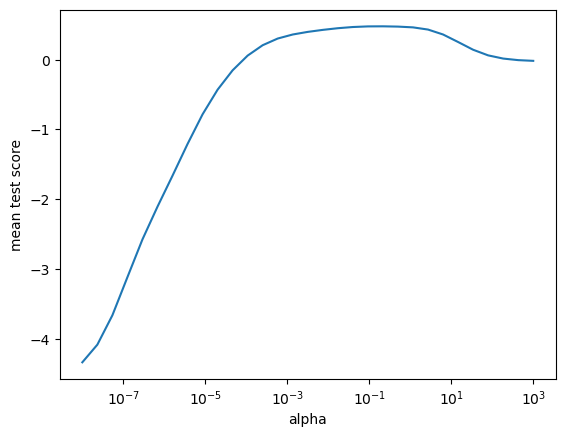

In [39]:
cross_val_score(GaussianProcessRegressor(normalize_y=True), train_features_pca, train_target)
reg_cv = GridSearchCV(GaussianProcessRegressor(normalize_y=True), {"alpha": np.logspace(-8, 3, 31)})
reg_cv.fit(train_features_pca, train_target);
plt.semilogx(reg_cv.cv_results_["param_alpha"].data, reg_cv.cv_results_["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("mean test score");

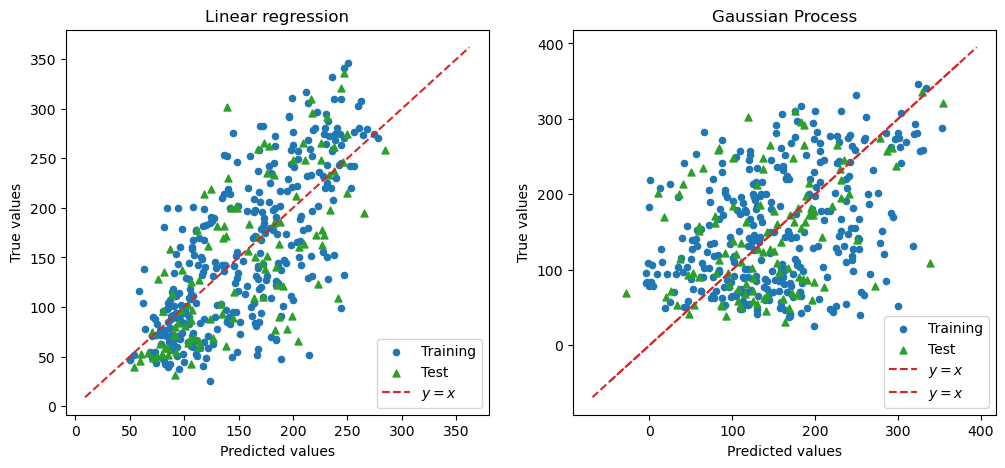

In [40]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

# Plotting linear regession with dimensionality reduction.
ax[0].scatter(train_predict_lr0, train_target, c="C0", s=20, label="Training")
ax[0].scatter(test_predict_lr0, test_target, c="C2", s=25, marker="^", label="Test")
corners = np.diag(np.quantile(np.stack([ax[0].get_xlim(), ax[0].get_ylim()]), [0, 1], axis=0))
ax[0].plot(corners, corners, c="C3", ls="--", label="$y=x$")
ax[0].set_title("Linear regression")
ax[0].set_xlabel("Predicted values")
ax[0].set_ylabel("True values")
ax[0].legend(loc="lower right")

# Plotting for Gaussian Process regression with dimensionality reduction.
ax[1].scatter(train_predict_gp0, train_target, c="C0", s=20, label="Training")
ax[1].scatter(test_predict_gp0, test_target, c="C2", s=25, marker="^", label="Test")
corners = np.diag(np.quantile(np.stack([ax[1].get_xlim(), ax[1].get_ylim()]), [0, 1], axis=0))
ax[1].plot(corners, corners, c="C3", ls="--", label="$y=x$")
ax[1].set_title("Gaussian Process")
ax[1].set_xlabel("Predicted values")
ax[1].set_ylabel("True values")
ax[1].legend(loc="lower right")

# to help determine the limits of the plot.
corners = np.diag(np.quantile(np.stack([plt.gca().get_xlim(), plt.gca().get_ylim()]), [0, 1], axis=0))
plt.plot(corners, corners, c="C3", ls="--", label="$y=x$")

plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.legend(loc="lower right");

In [41]:
# Calculate MSE for training and testing set 

#Linear 
train_mse_lr0 = mean_squared_error(train_target, train_predict_lr0)
test_mse_lr0 = mean_squared_error(test_target, test_predict_lr0)
print("Linear Train MSE:", train_mse_lr0)
print("Linear Test MSE:", test_mse_lr0)

#Gaussian
train_mse_gp0 = mean_squared_error(train_target, train_predict_gp0)
test_mse_gp0 = mean_squared_error(test_target, test_predict_gp0)
print("Gaussian Train MSE:", train_mse_gp0)
print("Gaussian Test MSE:", test_mse_gp0)
#----------------------------------------------------------------------------------------------------

# Calculate R-squared for training and testing set

#Linear
train_r2_lr0 = r2_score(train_target, train_predict_lr0)
test_r2_lr0 = r2_score(test_target, test_predict_lr0)
print("Linear Train R-squared:", train_r2_lr0)
print("Linear Test R-squared:", test_r2_lr0)

Linear Train MSE: 2869.6039543231964
Linear Test MSE: 3082.2476224773714
Gaussian Train MSE: 7572.54883046558
Gaussian Test MSE: 7185.18065569836
Linear Train R-squared: 0.5152373566066455
Linear Test R-squared: 0.48158065025409635


## 2. Gaussian Process Regression compared with Linear, adjustment of hyperparameter alpha.

In [42]:
#Splitting data into testing and training.
train_features, test_features, train_target, test_target = train_test_split(df2[["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]], df2["target"], test_size=0.25, random_state=123)

In [43]:
reg = LinearRegression()
reg.fit(train_features, train_target)
train_predict = reg.predict(train_features)
test_predict = reg.predict(test_features)
print(reg.coef_, reg.intercept_)

[  29.86776596 -244.71800399  496.94398559  316.10984437 -805.22595689
  447.64502499  110.57764843  279.56782309  683.82210035   77.44862371] 152.57263796494206


In [44]:
reg_lr = LinearRegression()
reg_lr.fit(train_features, train_target)
train_predict_lr1 = reg_lr.predict(train_features)
test_predict_lr1 = reg_lr.predict(test_features)

reg_gp = GaussianProcessRegressor(normalize_y=True)
reg_gp.fit(train_features, train_target)
train_predict_gp1 = reg_gp.predict(train_features)
test_predict_gp1 = reg_gp.predict(test_features)

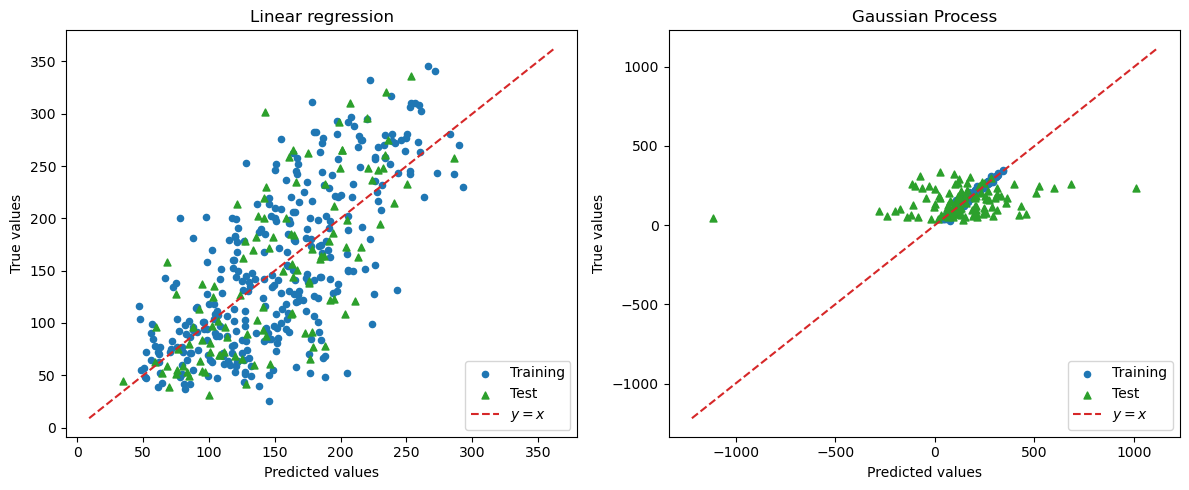

In [45]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

# Plot for Linear regression (no modifications)
ax[0].scatter(train_predict_lr1, train_target, c="C0", s=20, label="Training")
ax[0].scatter(test_predict_lr1, test_target, c="C2", s=25, marker="^", label="Test")
corners = np.diag(np.quantile(np.stack([ax[0].get_xlim(), ax[0].get_ylim()]), [0, 1], axis=0))
ax[0].plot(corners, corners, c="C3", ls="--", label="$y=x$")
ax[0].set_title("Linear regression")
ax[0].set_xlabel("Predicted values")
ax[0].set_ylabel("True values")
ax[0].legend(loc="lower right")

# Plot for Gaussian Process Regression (no modifications)
ax[1].scatter(train_predict_gp1, train_target, c="C0", s=20, label="Training")
ax[1].scatter(test_predict_gp1, test_target, c="C2", s=25, marker="^", label="Test")
corners = np.diag(np.quantile(np.stack([ax[1].get_xlim(), ax[1].get_ylim()]), [0, 1], axis=0))
ax[1].plot(corners, corners, c="C3", ls="--", label="$y=x$")
ax[1].set_title("Gaussian Process")
ax[1].set_xlabel("Predicted values")
ax[1].set_ylabel("True values")
ax[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


In [46]:
# Calculate MSE for training and testing set 

#Linear 
train_mse_lr = mean_squared_error(train_target, train_predict_lr1)
test_mse_lr = mean_squared_error(test_target, test_predict_lr1)
print("Linear Train MSE:", train_mse_lr)
print("Linear Test MSE:", test_mse_lr)

#Gaussian
train_mse_gp = mean_squared_error(train_target, train_predict_gp1)
test_mse_gp = mean_squared_error(test_target, test_predict_gp1)
print("Gaussian Train MSE:", train_mse_gp)
print("Gaussian Test MSE:", test_mse_gp)

#----------------------------------------------------------------------------------------------------

# Calculate R-squared for training and testing set

#Linear
train_r2_lr1 = r2_score(train_target, train_predict_lr1)
test_r2_lr1 = r2_score(test_target, test_predict_lr1)
print("Linear Train R-squared:", train_r2_lr1)
print("Linear Test R-squared:", test_r2_lr1)

#Gaussian
train_r2_gp1 = r2_score(train_target, train_predict_gp1)
test_r2_gp1 = r2_score(test_target, test_predict_gp1)
print("Gaussian Train R-squared:", train_r2_gp1)
print("Gaussian Test R-squared:", test_r2_gp1)

Linear Train MSE: 2858.8921020774865
Linear Test MSE: 2912.316255244549
Gaussian Train MSE: 97.53619902828294
Gaussian Test MSE: 44694.204038533804
Linear Train R-squared: 0.5170469114765592
Linear Test R-squared: 0.5101622957584458
Gaussian Train R-squared: 0.9835231946916374
Gaussian Test R-squared: -6.517351956441501


In [47]:
cross_val_score(GaussianProcessRegressor(normalize_y=True), train_features, train_target)

array([-13.44838491, -20.87551959, -21.01005646, -13.24170055,
       -15.97258383])

In [48]:
reg_cv = GridSearchCV(GaussianProcessRegressor(normalize_y=True), {"alpha": np.logspace(-8, 3, 31)})
reg_cv.fit(train_features, train_target);

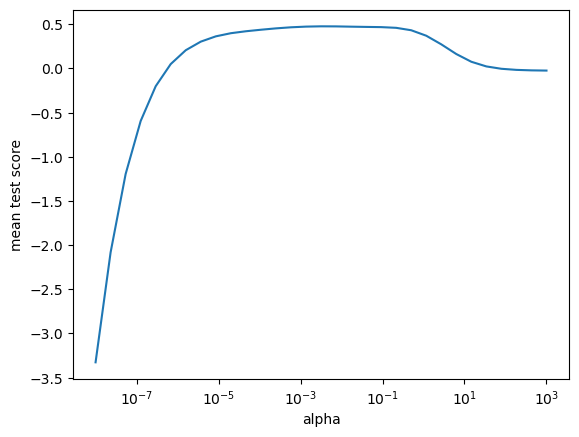

In [49]:
plt.semilogx(reg_cv.cv_results_["param_alpha"].data, reg_cv.cv_results_["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("mean test score");

In [50]:
reg_lr = LinearRegression()
reg_lr.fit(train_features, train_target)
train_predict_lr2 = reg_lr.predict(train_features)
test_predict_lr2 = reg_lr.predict(test_features)

reg_gp = GaussianProcessRegressor(normalize_y=True, alpha = 0.001)
reg_gp.fit(train_features, train_target)
train_predict_gp2 = reg_gp.predict(train_features)
test_predict_gp2 = reg_gp.predict(test_features)

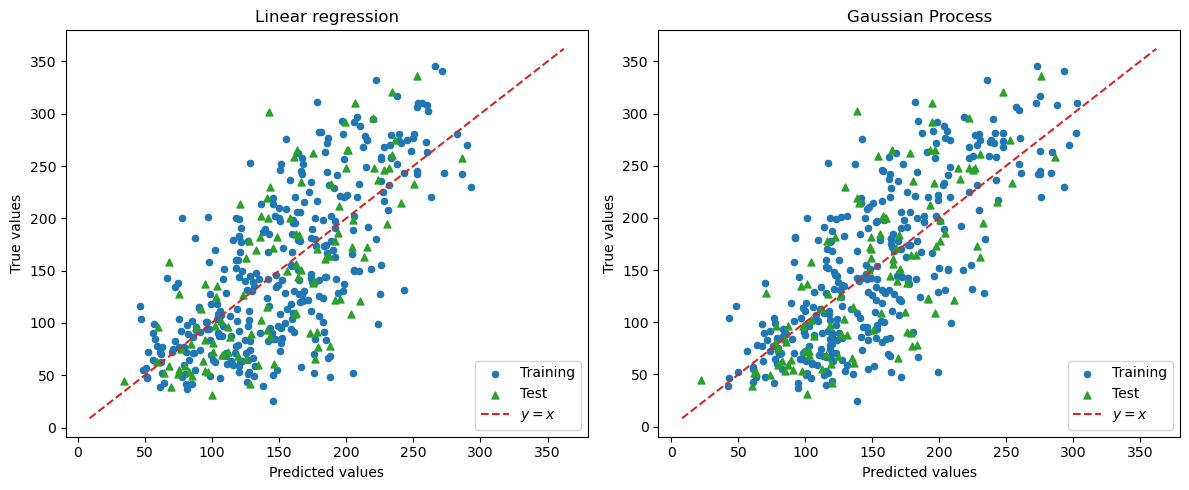

In [51]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

# Plot again for Linear regression
ax[0].scatter(train_predict_lr2, train_target, c="C0", s=20, label="Training")
ax[0].scatter(test_predict_lr2, test_target, c="C2", s=25, marker="^", label="Test")
corners = np.diag(np.quantile(np.stack([ax[0].get_xlim(), ax[0].get_ylim()]), [0, 1], axis=0))
ax[0].plot(corners, corners, c="C3", ls="--", label="$y=x$")
ax[0].set_title("Linear regression")
ax[0].set_xlabel("Predicted values")
ax[0].set_ylabel("True values")
ax[0].legend(loc="lower right")

# Plot for Gaussian Process regression with augmented alpha value to account for the overfitting.
ax[1].scatter(train_predict_gp2, train_target, c="C0", s=20, label="Training")
ax[1].scatter(test_predict_gp2, test_target, c="C2", s=25, marker="^", label="Test")
corners = np.diag(np.quantile(np.stack([ax[1].get_xlim(), ax[1].get_ylim()]), [0, 1], axis=0))
ax[1].plot(corners, corners, c="C3", ls="--", label="$y=x$")
ax[1].set_title("Gaussian Process")
ax[1].set_xlabel("Predicted values")
ax[1].set_ylabel("True values")
ax[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate MSE for training and testing set 

#Linear 
train_mse_lr2 = mean_squared_error(train_target, train_predict_lr2)
test_mse_lr2 = mean_squared_error(test_target, test_predict_lr2)
print("Linear Train MSE:", train_mse_lr2)
print("Linear Test MSE:", test_mse_lr2)

#Gaussian
train_mse_gp2 = mean_squared_error(train_target, train_predict_gp2)
test_mse_gp2 = mean_squared_error(test_target, test_predict_gp2)
print("Gaussian Train MSE:", train_mse_gp2)
print("Gaussian Test MSE:", test_mse_gp2)

#----------------------------------------------------------------------------------------------------

# Calculate R-squared for training and testing set
#Is this valid or useful?

#Linear
train_r2_lr2 = r2_score(train_target, train_predict_lr2)
test_r2_lr2 = r2_score(test_target, test_predict_lr2)
print("Linear Train R-squared:", train_r2_lr2)
print("Linear Test R-squared:", test_r2_lr2)

#Gaussian
train_r2_gp2 = r2_score(train_target, train_predict_gp2)
test_r2_gp2 = r2_score(test_target, test_predict_gp2)
print("Gaussian Train R-squared:", train_r2_gp2)
print("Gaussian Test R-squared:", test_r2_gp2)


Linear Train MSE: 2858.8921020774865
Linear Test MSE: 2912.316255244549
Gaussian Train MSE: 2535.227192297911
Gaussian Test MSE: 2768.4679432260787
Linear Train R-squared: 0.5170469114765592
Linear Test R-squared: 0.5101622957584458
Gaussian Train R-squared: 0.5717236751470443
Gaussian Test R-squared: 0.5343568957752747
